---
title: "statistical power"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

## motivation

In the chapter [independent samples t-test](/hypothesis_testing/t_test_independent_samples.ipynb), we asked the question:

**Are 12-year old girls significantly taller than 12-year old boys?**

We showed that, when sampling 10 boys and 14 girls, we could not reject the null hypothesis that boys and girls have the same mean height. This was so because our p-value was higher that our significance level $\alpha=0.05$. We then increased the sample sizes to 250 boys and 200 girls, and now the p-value dropped below $\alpha$, so we could reject the null hypothesis, and accept the alternative hypothesis that girls are significantly taller than boys.

Statistical power is the idea behind this relationship between sample size and our ability to discern (or not) significant effects in our data.


## the burning house mnemonic

In my house I have a fire alarm. Sometimes it goes off without any apparent reason, or just because it sensed a little smoke from my toaster. Sure, this is annoying, but no sensor is perfect, and that's the price I pay for securing my house. Online reviews of this fire alarm system say that this is a great choice, because the chance that there is a real fire and that the alarm doesn't notice it is miniscule, but nonzero nonetheless.

Let's make this scenario more structured. For every hour that passes, there can either be a fire in the house or not. In that same time interval, the fire alarm might go off or not.

In trying to secure my house from fire, I have to consider two important probabilities.

1. I really don't want any misses, that is, events when there's a real fire and the alarm doesn't notice it. Let's call $\beta$ the probability that, in the case of a real fire, the alarm misses a real fire. It will be easy to remember $\beta$, it stands for **burn**.
1. I can take precautions to decrease the chance that I don't notice a real fire and my house burns: I can by a more sensitive sensor, or install many more sensors around the house. The downside of that is that the alarm will sound a lot more often, and almost always it will be a false alarm. Let's call $\alpha$ the probability that there wasn't any fire in the house, but the alarm went off. $\alpha$ stads for false **alarm**.

Nothing is perfect in the real world, and I have a tradeoff between $\alpha$ and $\beta$:

* If I am super risk-averse, I can decrease $\beta$, the chance that my house will **burn** without the alarm going off, and at the same time increase $\alpha$, the chance of false alarms.
* If I can't stand having the alarm going off all the time without reason, I can decrease $\alpha$ by decreasing the sensitivity of the sensor, but that will necessarily increase $\beta$.
* This is not a binary choice, it's a tradeoff. The only way of getting the best of both worlds is by spending a lot of money. For example, I could buy 20 super-precise sensors and spread them around the house, and only have the alarm go off when 5 of them identify smoke, so my toaster alone will not trigger any false alarms.

The whole point of this "burning house" example is to help me (and maybe you) remember what $\alpha$ and $\beta$ mean. They are also given the horrible names of Type I and Type II errors, which baffles me: who would want to remember these names? Not all is lost, in the greek alphabet $\alpha$ is the 1st letter and $\beta$ is the 2nd, so we can rely on that to remember what are Type I and Type II errors. If I were king of statistics for one day, I would call the two types of error simply "false alarms" and "misses".

## statistical power

Statistical power the probability of correctly identifying the fire. Mathematically, it's $1-\beta$. In the the language of hypothesis testing:

* H0, Null Hypothesis: there isn't any fire.
* H1, Alternative Hypothesis: there is a fire.
* Power is the probability that I will correctly reject H0. That's the whole point of an alarm system! That's the whole point of any experiment designed to test a hypothesis! Sure, if H0 is indeed true, then I would want not to reject it.

The quantities $\alpha$ and $\beta$ are usually visualized in a matrix:

<style>
  .table-bordered td, 
  .table-bordered th {
    border: 1px solid #dee2e6 !important;
  }
</style>

::: {.table-bordered}
| | H0 is True<br>There is no fire {{< iconify pepicons-pop fire-off style="color:gray;" size=2x >}} | H0 is False<br>There is a fire {{< iconify pepicons-pop fire style="color:orange;" size=2x >}}|
|---|:---:|:---:|
| Reject H0<br>Sound the alarm! {{< iconify mdi alarm-light style="color:blue;" size=2x >}} | False **alarm** $=\alpha$<br>Type I Error<br>{{< iconify fa7-solid xmark-square style="color:red;" size=5x >}} | Correctly identify the fire<br>Power $= 1-\beta$<br>{{< iconify fa7-solid check-square style="color:green;" size=5x >}} |
| Fail to Reject H0<br>Alarm stays quiet {{< iconify mdi alarm-light-off-outline style="color:blue;" size=2x >}}| No fire and no alarm<br>$(1-\alpha)$<br>{{< iconify fa7-solid check-square style="color:green;" size=5x >}} | House **burned** $=\beta$<br>Type II Error<br>{{< iconify fa7-solid xmark-square style="color:red;" size=5x >}}|
:::

In this table, the probabilities are meant to be read vertically:

\begin{align*}
\underbrace{Pr(\text{alarm}\mid \text{No fire} )}_{\alpha} + 
\underbrace{Pr(\text{no alarm}\mid \text{No fire})}_{1-\alpha} &= 1 \\
\underbrace{Pr(\text{alarm}\mid \text{Fire} )}_{1-\beta} + 
\underbrace{Pr(\text{no alarm}\mid \text{Fire})}_{\beta} &= 1
\end{align*}


## power analysis

Power analysis is a puzzle made of four pieces:

* **statistical significance:** This is $\alpha$, the probability of false alarms.
* **statistical power:** This is $1-\beta$, the probability of correctly identifying a real effect.
* **effect size:** What is the difference between my two hypothesis (The null $H_0$ and the alternative $H_1$).
* **sample size:** Self explanatory.

If I know three of the four, I can figure out the one missing. In general, $\alpha$ and $\beta$ are determined by the experimenter, and we are left with two common cases:

1. Given an expected effect size, I want to figure out the minimum sample size that gives me a high probability of rejecting $H_0$ if the effect is real.
1. Given a fixed sample size (e.g. limited resources), what is the greatest effect size I can hope to identify?

Let's go back to the question at the very top of this chapter:

**Are 12-year old girls significantly taller than 12-year old boys?**

We will perform the simplest power analysis we can, just to demonstrate the logic involved in the calculation. We will assume the following:

* $\alpha=0.05$, this is the standard, "vanilla" value for statistical significance.
* $1-\beta=0.80$, this is the standard, "vanilla" value for statistical power.
* We assume that the standard deviation in the population is known for each sex, and that it is equal. Here we assume it to be $\sigma=7.39$ cm.
* Assume that we will sample the same number of boys and girls, call it $n$.
* Assume that $n$ is large enough, such that, according to the Central Limit Theorem, the means will be normally distributed.
* Our question asks whether girls are taller than boys, so we will use a one-sided test. If instead we were asking if girls are significantly different from boys then it would be a two-sided test.

Let's call $\bar h_\text{girls}$ and $\bar h_\text{boys}$ the sample mean heights of girls and boys.
Then, the estimator for the difference in mean height is

$$
\hat{\Delta} = \bar h_\text{girls} - \bar h_\text{boys}
$$

Because we assume that $n$ is large enough, the means for girls and boys are normally distributed, centered around the true population means, and with variance $\sigma^2/n$ (see [Central Limit Theorem](https://yairmau.com/statistics/confidence_interval/analytical_confidence_interval.html#clt)). This means that their difference is also normally distributed:

$$
\hat{\Delta} \sim \mathcal{N}\left( \Delta, \frac{2\sigma^2}{n}\right),
$$

where $\Delta$ is the true difference in mean height between girls and boys. The factor of 2 arises because the difference in sample means contains uncertainty from both groups; since the two sample means are independent, their variances add.

For convenience, we can standardize $\hat{\Delta}$ to get a Z-score:

$$
Z = \frac{\hat{\Delta}}{\sigma\sqrt{2/n}}
$$

Under the Null Hypothesis $H_0$, there is no  difference between the population mean of girls and boys ($\Delta=0$), so

$$
Z_{H_0} \sim \mathcal{N}\left(0, 1\right).
$$

The Alternative Hypothesis $H_1$ states that girls are on average taller than boys ($\Delta>0$), so

$$
Z_{H_1} \sim \mathcal{N}\left(\frac{\Delta}{\sigma}\sqrt{\frac{n}{2}}, 1\right).
$$

In this example, the effect size will be quantified by the Cohen's $d$, given by $d=\Delta/\sigma$, which is the true difference in units of standard deviation. Therefore, we can write another expression for $Z_{H_1}$ as

$$
Z_{H_1} \sim \mathcal{N}\left(d\sqrt{\frac{n}{2}}, 1\right).
$$


Let's visualize all this in a widget.

* Panel (a) shows the distribution of $\hat{\Delta}$ for two sampling quantities, and you can play with the sliders to choose any values you want. It's easy to see how increasing the sample size makes the standard error of the mean smaller ($\sigma/\sqrt{n}$), which causes the distribution to become more concentrated.
* Panel (b) shows the differences after the standardization, that is, their Z-scores. The black curve shows the H0 distribution. As the sample number increases, the H1 distributions move to the right, meaning that it should be easier for us to  see the effect we're looking for.

In [45]:
#| code-summary: "import libraries"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
sns.set_theme(style="ticks", font_scale=1.5)
from scipy.stats import norm, ttest_ind, t
# %matplotlib widget

In [46]:
#| code-summary: "load data"
df_boys = pd.read_csv('../archive/data/height/boys_height_stats.csv', index_col=0)
df_girls = pd.read_csv('../archive/data/height/girls_height_stats.csv', index_col=0)
age = 12.0
mu_boys = df_boys.loc[age, 'mu']
mu_girls = df_girls.loc[age, 'mu']
sigma_boys = df_boys.loc[age, 'sigma']
sigma_girls = df_girls.loc[age, 'sigma']
sigma = (sigma_boys + sigma_girls)/2
Delta = (mu_girls - mu_boys)
cohens_d = Delta / sigma

In [47]:
#| code-summary: "widget"
# --- Parameters ---
seed = 2  # change this to any int (or set to None for non-reproducible draws)
delta = mu_girls - mu_boys
num_samples_dist = 5000
bin_step = 0.2

# colors
c_n1 = "#dbb40c"
c_n2 = "#86b4a9"
c_null = "#000000"

# --- RNG (seedable) ---
rng = np.random.default_rng(seed) if seed is not None else np.random.default_rng()

# --- Independent random draws ---
data_dist = pd.DataFrame({"sample_id": np.arange(num_samples_dist)})
data_dist["z0"] = rng.normal(0, 1, num_samples_dist)  # null
data_dist["z1"] = rng.normal(0, 1, num_samples_dist)  # N1
data_dist["z2"] = rng.normal(0, 1, num_samples_dist)  # N2

# --- Interactive sliders ---
n1_slider = alt.param(name="N1", value=50,  bind=alt.binding_range(min=5, max=400, step=1, name="n1 "))
n2_slider = alt.param(name="N2", value=400, bind=alt.binding_range(min=5, max=400, step=1, name="n2 "))

# ------------------------------------------------------------------
# helper: step histogram from a single computed value column
# if label is not None, it creates a "lbl" field for legend/color
# ------------------------------------------------------------------
def step_hist(calc_expr, x_domain, y_domain, x_title, color=None, label=None, show_legend=False):
    base = (
        alt.Chart(data_dist)
        .transform_calculate(value=calc_expr)
        .transform_joinaggregate(total="count()")
        .transform_bin(
            ["bin_start", "bin_end"],
            field="value",
            bin=alt.Bin(extent=x_domain, step=bin_step),
        )
        .transform_aggregate(count="count()", groupby=["bin_start", "bin_end", "total"])
        .transform_calculate(density=f"datum.count / (datum.total * {bin_step})")
        .mark_line(interpolate="step", strokeWidth=2.5)
        .encode(
            x=alt.X("bin_start:Q", scale=alt.Scale(domain=x_domain), title=x_title),
            y=alt.Y("density:Q", stack=None, scale=alt.Scale(domain=y_domain), title="Density"),
        )
        .properties(width=620, height=230)
    )

    if label is None:
        return base.encode(color=alt.value(color))

    leg = (
        alt.Legend(
            title=None,
            orient="right",
            labelFontSize=14,
            symbolSize=180,
            symbolStrokeWidth=3,
        )
        if show_legend
        else None
    )

    return (
        base
        .transform_calculate(lbl=f"'{label}'")
        .encode(
            color=alt.Color(
                "lbl:N",
                scale=alt.Scale(domain=["N1", "N2"], range=[c_n1, c_n2]),
                legend=leg,
            )
        )
    )

# ---------------- TOP PANEL (only N1 and N2) ----------------
top_n1 = step_hist(
    calc_expr=f"{delta} + datum.z1 * sqrt(2 * {sigma**2} / N1)",
    x_domain=[-5, 10],
    y_domain=[0, 1.0],
    x_title="Observed Difference of Means (Δ̂)",
    label="N1",
    show_legend=True,
)

top_n2 = step_hist(
    calc_expr=f"{delta} + datum.z2 * sqrt(2 * {sigma**2} / N2)",
    x_domain=[-5, 10],
    y_domain=[0, 1.0],
    x_title="Observed Difference of Means (Δ̂)",
    label="N2",
    show_legend=True,
)

top_row = alt.layer(top_n1, top_n2).properties(
    title="(a): Distribution of Sample Mean Differences"
).resolve_scale(color="shared")

# ---------------- BOTTOM PANEL (null + alts, no legend) ----------------
bottom_null = step_hist(
    calc_expr="datum.z0",
    x_domain=[-3, 7],
    y_domain=[0, 0.6],
    x_title="Standardized Value (Z)",
    color=c_null,
)

bottom_n1 = step_hist(
    calc_expr=f"datum.z1 + ({delta} / ({sigma} * sqrt(2 / N1)))",
    x_domain=[-3, 7],
    y_domain=[0, 0.6],
    x_title="Standardized Value (Z)",
    color=c_n1,
)

bottom_n2 = step_hist(
    calc_expr=f"datum.z2 + ({delta} / ({sigma} * sqrt(2 / N2)))",
    x_domain=[-3, 7],
    y_domain=[0, 0.6],
    x_title="Standardized Value (Z)",
    color=c_n2,
)

null_text = alt.Chart(pd.DataFrame({"x": [-1.0], "y": [0.4], "label": ["Null"]})).mark_text(
    align="left",
    baseline="middle",
    fontSize=18,
    color="black",
).encode(
    x="x:Q",
    y="y:Q",
    text="label:N"
)

bottom_row = alt.layer(bottom_null, bottom_n1, bottom_n2, null_text).properties(
    title="(b): Distributions of Standardized Differences"
)

# ---------------- FINAL ----------------
chart = (
    alt.vconcat(top_row, bottom_row)
    .add_params(n1_slider, n2_slider)
    .configure_view(stroke=None)
    .configure_axis(
        grid=True,
        titleFontSize=18,
        labelFontSize=14,
        titlePadding=10,
    )
    .configure_title(
        fontSize=20,
        anchor="start",
        offset=10,
    )
)

chart


alt.VConcatChart(...)

Note that in this widget, and in the ones below, we are not really drawing random samples each time we move the sliders. Your are reading this on a static website, and I don't have a python kernel to execute these calculations. I build this widget to give a feel of how the distributions would look like had we been able to run the code. The numbers N1 and N2 represent the sizes of the two samples, and we simulate the statistics of the means of 5000 such samples to build the distributions.

The two colored curves behave in the exact same way, I just thought it would be instructive to see how they compare. In the widget below, we show only one curve, and how it changes as we control either the sample size or the real difference $\Delta$ in the population between girls and boys. I find it really useful to get intuiton about the equation for $Z_{H_1}$. See how it responds a lot less in changes of $n$ because of the square root.

In [48]:
#| code-summary: "widget"
import numpy as np
import pandas as pd
import altair as alt

# --- Parameters ---
seed = 2  # change this to any int (or set to None for non-reproducible draws)
num_samples_dist = 5000
bin_step = 0.2

# colors
c_alt  = "#dbb40c"
c_null = "#000000"

# --- RNG (seedable) ---
rng = np.random.default_rng(seed) if seed is not None else np.random.default_rng()

# --- Independent random draws (fixed once) ---
data_dist = pd.DataFrame({"sample_id": np.arange(num_samples_dist)})
data_dist["z0"] = rng.normal(0, 1, num_samples_dist)  # null
data_dist["z1"] = rng.normal(0, 1, num_samples_dist)  # alt

# --- Interactive sliders ---
n_slider = alt.param(
    name="n", value=50,
    bind=alt.binding_range(min=5, max=400, step=1, name="n ")
)
delta_slider = alt.param(
    name="Δ", value=2.0,
    bind=alt.binding_range(min=0.0, max=5.0, step=0.1, name="Δ ")
)

# ------------------------------------------------------------------
# helper: step histogram from a single computed value column
# if label is not None, it creates a "lbl" field for legend/color
# ------------------------------------------------------------------
def step_hist(calc_expr, x_domain, y_domain, x_title, color=None):
    return (
        alt.Chart(data_dist)
        .transform_calculate(value=calc_expr)
        .transform_joinaggregate(total="count()")
        .transform_bin(
            ["bin_start", "bin_end"],
            field="value",
            bin=alt.Bin(extent=x_domain, step=bin_step),
        )
        .transform_aggregate(count="count()", groupby=["bin_start", "bin_end", "total"])
        .transform_calculate(density=f"datum.count / (datum.total * {bin_step})")
        .mark_line(interpolate="step", strokeWidth=2.5)
        .encode(
            x=alt.X("bin_start:Q", scale=alt.Scale(domain=x_domain), title=x_title),
            y=alt.Y("density:Q", stack=None, scale=alt.Scale(domain=y_domain), title="Density"),
            color=alt.value(color),
        )
        .properties(width=620, height=230)
    )

# ---------------- TOP PANEL (single curve: Δ-hat under H1) ----------------
# uses delta_slider (Δ) and n_slider (n)
top_alt = step_hist(
    calc_expr=f"Δ + datum.z1 * sqrt(2 * {sigma**2} / n)",
    x_domain=[-5, 10],
    y_domain=[0, 1.0],
    x_title="Observed Difference of Means (Δ̂)",
    color=c_alt,
)

top_row = top_alt.properties(title="(a): Distribution of Sample Mean Difference (H₁)")

# ---------------- BOTTOM PANEL (null + standardized H1) ----------------
bottom_null = step_hist(
    calc_expr="datum.z0",
    x_domain=[-3, 7],
    y_domain=[0, 0.6],
    x_title="Standardized Value (Z)",
    color=c_null,
)

bottom_alt = step_hist(
    calc_expr=f"datum.z1 + (Δ / ({sigma} * sqrt(2 / n)))",
    x_domain=[-3, 7],
    y_domain=[0, 0.6],
    x_title="Standardized Value (Z)",
    color=c_alt,
)

null_text = alt.Chart(pd.DataFrame({"x": [-1.0], "y": [0.4], "label": ["Null"]})).mark_text(
    align="left",
    baseline="middle",
    fontSize=18,
    color="black",
).encode(
    x="x:Q",
    y="y:Q",
    text="label:N"
)

bottom_row = alt.layer(bottom_null, bottom_alt, null_text).properties(
    title="(b): Standardized Distributions (H₀ vs H₁)"
)

# ---------------- FINAL ----------------
chart = (
    alt.vconcat(top_row, bottom_row)
    .add_params(n_slider, delta_slider)
    .configure_view(stroke=None)
    .configure_axis(
        grid=True,
        titleFontSize=18,
        labelFontSize=14,
        titlePadding=10,
    )
    .configure_title(
        fontSize=20,
        anchor="start",
        offset=10,
    )
)

chart


alt.VConcatChart(...)

The statistical significance $\alpha$ determines where we put the border between rejecting H0 or not. In this example, $\alpha=0.05$, and because we are dealing with a one-sided test, this border is located at the value of $Z$ that leaves 0.05 of the area below H0 to its right. This is the same as leaving $1-\alpha=0.95$ of the area to its left, so a common name in the literature is $z_{1-\alpha}$. The cumulative distribution function (CDF) is the integral of the probability density function (PDF) from $-\infty$ to $z$, so it quantifies the area to the **left** of $z$. We need the value $z$ for which the CDF is equal to $1-\alpha$. Luckily, we can use python's `scipy.stats.norm.ppf` function to get this value:

In [49]:
#| code-fold: false
zcrit = norm.ppf(0.95, loc=0, scale=1)
print(f"zcrit (for α=0.05) = {zcrit:.4f}")

zcrit (for α=0.05) = 1.6449


The probabilities $\alpha$ and $\beta$ are shown as shaded areas in the widget below. See what happens when you control the slider for $n$ and $\Delta$.

In [50]:
#| code-summary: "widget"
import numpy as np
import pandas as pd
import altair as alt

# --- constants ---
alpha = 0.05
zcrit = 1.6448536269514722  # one-sided z_{1-alpha}
sigma = 7.39

# x-grid
x = np.linspace(-4.0, 8.0, 1601)
df = pd.DataFrame({"x": x})

# sliders
n_slider = alt.param(
    name="n", value=50,
    bind=alt.binding_range(min=5, max=400, step=1, name="n ")
)
delta_slider = alt.param(
    name="Delta", value=2.0,
    bind=alt.binding_range(min=0.0, max=5.0, step=0.1, name="Δ ")
)

base = (
    alt.Chart(df)
    .add_params(n_slider, delta_slider)
    .transform_calculate(
        mu1=f"(Delta / {sigma}) * sqrt(n / 2)"
    )
    .transform_calculate(
        pdf0="(1 / sqrt(2 * PI)) * exp(-0.5 * datum.x * datum.x)",
        pdf1="(1 / sqrt(2 * PI)) * exp(-0.5 * pow(datum.x - datum.mu1, 2))"
    )
)

# ---------------- curves ----------------
h0_line = base.mark_line(strokeWidth=2.5, color="#000000").encode(
    x=alt.X("x:Q", title="z"),
    y=alt.Y("pdf0:Q", title="Density"),
)

h1_line = base.mark_line(strokeWidth=2.5, color="#dbb40c").encode(
    x="x:Q",
    y="pdf1:Q",
)

# ---------------- shaded regions ----------------
# alpha: H0 right tail
h0_shade = (
    base
    .transform_filter(f"datum.x >= {zcrit}")
    .mark_area(opacity=0.20, color="#808080")
    .encode(
        x="x:Q",
        y="pdf0:Q",
    )
)

# beta: H1 left of cutoff
h1_shade = (
    base
    .transform_filter(f"datum.x <= {zcrit}")
    .mark_area(opacity=0.20, color="#dbb40c")
    .encode(
        x="x:Q",
        y="pdf1:Q",
    )
)

# ---------------- decision boundary ----------------
crit_line = (
    alt.Chart(pd.DataFrame({"z": [zcrit]}))
    .mark_rule(strokeWidth=2, strokeDash=[6, 6], color="#808080")
    .encode(x="z:Q")
)

crit_label = alt.Chart(
    pd.DataFrame({"x": [zcrit], "y": [0.39], "t": [f"z critical (α={alpha})"]})
).mark_text(
    align="left", baseline="top", dx=6, fontSize=14, color="#808080"
).encode(
    x="x:Q",
    y="y:Q",
    text="t:N"
)

# ---------------- power label ----------------
power_text_1 = (
    alt.Chart(pd.DataFrame({"x": [5.0], "y": [0.38]}))
    .mark_text(
        align="left",
        baseline="middle",
        fontSize=16,
        color="#dbb40c",
    )
    .encode(
        x="x:Q",
        y="y:Q",
        text=alt.value("Statistical Power"),
    )
)

power_text_2 = (
    alt.Chart(pd.DataFrame({"x": [5.0], "y": [0.35]}))
    .transform_calculate(
        t=f"1.702 * ({zcrit} - ((Delta / {sigma}) * sqrt(n / 2)))",
        t_clamped="min(max(datum.t, -60), 60)",
        power="1 / (1 + exp(datum.t_clamped))",
        label="'1 − β = ' + format(datum.power, '.3f')"
    )
    .mark_text(
        align="left",
        baseline="middle",
        fontSize=16,
        color="#dbb40c",
    )
    .encode(
        x="x:Q",
        y="y:Q",
        text="label:N",
    )
)


# ---------------- legend for shaded areas ----------------
legend_df = pd.DataFrame({
    "region": ["α (False Alarms)", "β (Misses)"]
})

shade_legend = (
    alt.Chart(legend_df)
    .mark_point(size=120, filled=True, opacity=0)  # hide the dummy points
    .encode(
        color=alt.Color(
            "region:N",
            scale=alt.Scale(
                domain=["α (False Alarms)", "β (Misses)"],
                range=["#808080", "#dbb40c"],
            ),
            legend=alt.Legend(
                title="Shaded regions",
                orient="top-left",
                labelFontSize=14,
                titleFontSize=14,
                symbolSize=200,
                symbolOpacity=1,          # keep legend symbols visible
            ),
        )
    )
)


# ---------------- final chart ----------------
chart = (
    alt.layer(
        h0_shade,
        h1_shade,
        h0_line,
        h1_line,
        crit_line,
        crit_label,
        power_text_1,
        power_text_2,
        shade_legend,
    )
    .properties(width=600, height=360, title="H0 vs H1 in Z-space (α = 0.05)")
    .configure_view(stroke=None)
    .configure_axis(titleFontSize=18, labelFontSize=14, grid=True)
    .configure_title(fontSize=20, anchor="start", offset=10)
)

chart


alt.LayerChart(...)

So how can we compute the statistical power? If $\beta$ is the shaded area in yellow in the widget above, then the remaining area to the right is the statistical power, $1-\beta$. Remember that we already figured out how $H_1$ is distributed:

$$
Z_{H_1} \sim \mathcal{N}\left(\frac{\Delta}{\sigma}\sqrt{\frac{n}{2}}, 1\right).
$$

Therefore, the statistical power is given by

$$
\text{Power} = 1 - \beta = \int_{z_{1-\alpha}}^{\infty} f_{Z_{H_1}}(z) \, dz.
$$

We can combine the information in the two previous equations to get an explicit expression for the statistical power:
$$
\text{Power} = 1 - \beta = \int_{z_{1-\alpha}}^{\infty} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{(z - d\sqrt{n/2})^2}{2}\right) \, dz.
$$

We started this chapter by saying that power analysis is a puzzle made of four pieces: statistical significance, $\alpha$; statistical power, $1-\beta$; effect size, $d$; and sample size, $n$. By fixing any three of these quantities, we can solve for the fourth. When deriving these equations, we made several assumptions. A big one was that the sample size is large enough for the Central Limit Theorem to hold, and because of that we could use the normal distribution. A more rigorous treatment, valid for smaller sample sizes, would use the t-distribution instead of the normal distribution, but the fundamental logic would be the same. We will use python's `statsmodels` package to perform power analysis and solve two common questions that arise when desigining an experiment.

## in action

### how many samples do I need?

How many boys and girls do I need to sample to have an 80% chance of detecting a real difference in mean height? We assume that:

* The expected difference in mean height is not so large, $\Delta=\mu_{\text{girls}} - \mu_{\text{boys}}=2.05$ cm.
* The standard deviation in both populations is quite similar, about $\sigma=7.39$ cm.
* We want to use a significance level of $\alpha=0.05$.
* We want to have a statistical power of $1-\beta=0.8$.

In [51]:
#| code-fold: false
import statsmodels.stats.power as smp
power_analysis = smp.TTestIndPower()
cohens_d = Delta / sigma
sample_size = power_analysis.solve_power(effect_size=cohens_d, power=0.8, alpha=0.05)
print(f"sample size: {sample_size:.0f}")

sample size: 206


We can easily plot power curves for various effect sizes using the `plot_power` method of `statsmodels.stats.power.TTestIndPower`.

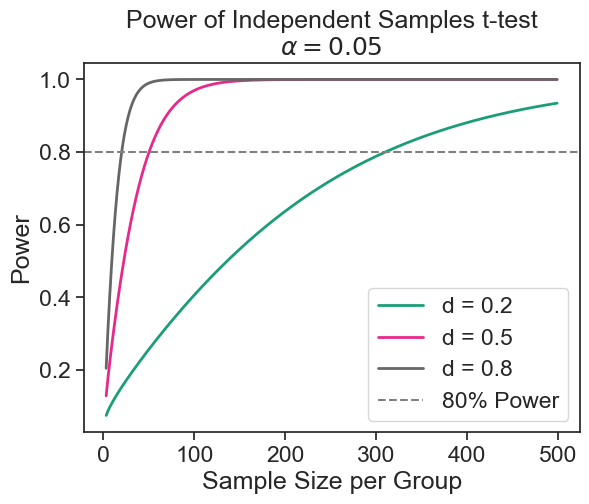

In [52]:
#| code-summary: "power curve"
normalized_effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(3, 500, 1))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig = power_analysis.plot_power(
    dep_var='nobs', nobs=sample_sizes,  
    effect_size=normalized_effect_sizes, alpha=0.05, ax=ax, alternative="larger",
    title='Power of Independent Samples t-test\n$\\alpha = 0.05$')
ax.axhline(0.8, color='gray', linestyle='--', label='80% Power')
ax.legend(['d = 0.2', 'd = 0.5', 'd = 0.8', '80% Power'])
ax.set(ylabel='Power', xlabel='Sample Size per Group');

### what is the minimum effect size I can detect?

Assume that I have limited resources, and I can only sample 50 boys and 50 girls. From the result above, I could not detect a difference of 2.05 cm with high probability. What difference in mean height can I hope to detect with high probability? We assume that:

* The standard deviation in both populations is quite similar, about $\sigma=7.39$ cm.
* We want to use a significance level of $\alpha=0.05$.
* We want to have a statistical power of $1-\beta=0.8$.
* The sample size is fixed to $n=50$.

In [53]:
#| code-fold: false
import statsmodels.stats.power as smp
power_analysis = smp.TTestIndPower()
sample_size = 50
effect_size = power_analysis.solve_power(nobs1=sample_size, power=0.8, alpha=0.05)
print(f"minimum detectable effect size: Cohen's d = {effect_size:.2f}")
print(f"minimum detectable effect size: Delta = {effect_size * sigma:.2f} cm")

minimum detectable effect size: Cohen's d = 0.57
minimum detectable effect size: Delta = 4.18 cm


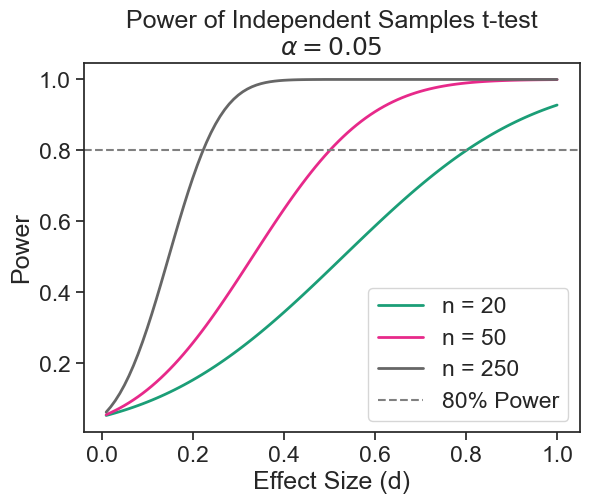

In [54]:
#| code-summary: "power curve"
effect_sizes = np.arange(0.01, 1.01, 0.01)
sample_sizes = np.array([20, 50, 250])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig = power_analysis.plot_power(
    dep_var='effect_size', nobs=sample_sizes,  
    effect_size=effect_sizes, alpha=0.05, ax=ax, alternative="larger",
    title='Power of Independent Samples t-test\n$\\alpha = 0.05$')

ax.axhline(0.8, color='gray', linestyle='--', label='80% Power')
ax.legend(['n = 20', 'n = 50', 'n = 250', '80% Power'])
ax.set(ylabel='Power', xlabel='Effect Size (d)');